In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import warnings
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
from warnings import filterwarnings
filterwarnings('ignore')

# Path of file to read
data_path = 'CollegeBasketballPlayers2009-2021.csv'
total_ball_data = pd.read_csv(data_path, low_memory = False)

Prezentacja danych

In [20]:
total_ball_data #61061

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.39380,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3210,108.5270,0.893017,49.964400,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.06600,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0780,104.0170,1.880030,111.929000,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.10700,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5560,102.1540,2.763870,115.021000,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.20860,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8580,106.5560,1.218710,84.169800,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.85540,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0520,100.7240,1.992790,128.028000,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,20.3,0.0,Fr,8-Jun,12,-0.117667,62.64930,0.0,2021,74229,all,93.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.1939,61.6342,0.341560,1.324650,1.175740,-5.172880,6.348620,18.161500,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,11-Jun,33,-0.859158,19.23020,0.0,2021,74230,all,NaN,0.000000,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,119.3690,124.7220,0.032976,1.432110,-11.362500,-7.448800,-3.913670,-12.236100,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,24,-0.326039,-8.70362,0.0,2021,74231,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.6320,108.0530,0.066632,0.098523,-4.939260,-4.485900,-0.453364,-4.651630,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,30,-

In [21]:
total_ball_data.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

Zmiana zmiennej objasnianej 'pick' na zmienną binarną

In [28]:
#Przerabiam dane - zmienną objasniana pick przerabiam na binarną
total_ball_data["pick"] = total_ball_data["pick"].replace(np.nan, 0)
for i in range(len(total_ball_data)):
    if total_ball_data["pick"][i] >=1:
        total_ball_data["pick"][i]=1

total_ball_data['pick'] = total_ball_data['pick'].astype(int)

In [29]:
total_ball_data = total_ball_data.drop(['ht', 'yr', 'num', 'pid', 'type', 'Rec Rank', 'gbpm', 'ogbpm', 'dgbpm', 'Unnamed: 64', 'Unnamed: 65'], axis=1)


Weryfikacja brakujących danych

In [31]:
total_ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61061 non-null  object 
 1   team                             61061 non-null  object 
 2   conf                             61061 non-null  object 
 3   GP                               61061 non-null  int64  
 4   Min_per                          61061 non-null  float64
 5   Ortg                             61061 non-null  float64
 6   usg                              61061 non-null  float64
 7   eFG                              61061 non-null  float64
 8   TS_per                           61061 non-null  float64
 9   ORB_per                          61061 non-null  float64
 10  DRB_per                          61061 non-null  float64
 11  AST_per                          61061 non-null  float64
 12  TO_per            

In [43]:
#filtruje przez te 3 kolumny zeby nie stracic zbyt duzej liczby zmiennych objasniajacych 
# w ten sposob tracę 9 a nie 34 zmiennych objasniajacych
total_ball_data =total_ball_data[total_ball_data['drtg'].notna()]
total_ball_data =total_ball_data[total_ball_data['ast'].notna()]
total_ball_data =total_ball_data[total_ball_data['dunksmade'].notna()]

total_ball_data['rimmade/(rimmade+rimmiss)'].fillna(0, inplace=True)
total_ball_data['midmade/(midmade+midmiss)'].fillna(0, inplace=True)
total_ball_data['dunksmade/(dunksmade+dunksmiss)'].fillna(0, inplace=True)
total_ball_data['ast/tov'].fillna(0, inplace=True)

In [44]:
null_columns = total_ball_data.columns[total_ball_data.isnull().any()]

# count number of columns with NaN values
num_null_columns = len(null_columns)

# print names of columns with NaN values
print("Columns with NaN values: ", list(null_columns))
print("Number of columns with NaN values: ", num_null_columns)

Columns with NaN values:  []
Number of columns with NaN values:  0


In [50]:
total_ball_data = total_ball_data._get_numeric_data()

Na danych do 2020 roku włącznie uczę model. Na danych z 2021 dokonam weryfikacji modelu. 

In [52]:
ball_data = total_ball_data.loc[total_ball_data['year'] < 2021]
ball_data = ball_data.drop(['year'], axis=1)
ball_data_2021 = total_ball_data.loc[total_ball_data['year'] == 2021]
ball_data_2021 = ball_data_2021.drop(['year'], axis=1)
ball_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
4589,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,14.1,33,62,0.532,70,134,0.522,36,100,0.360,0.9,1.4,26.5,1.915280,104.7920,2.7,1.035461,48.0,75.0,22.0,59.0,0.640000,0.372881,6.0,7.0,0.857143,0,100.8750,98.5761,2.636630,124.827000,2.282520,2.426980,-0.144461,27.3125,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4590,11,1.0,121.1,16.8,75.0,75.00,0.0,0.0,15.8,24.8,0,0,0.000,0,1,0.000,2,3,0.667,0.0,0.0,0.0,0.151246,116.4680,8.0,0.637097,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0,102.8780,101.9380,0.116247,1.586250,-3.890510,0.869061,-4.759570,1.3636,0.0000,0.0000,0.0000,0.0909,0.0000,0.0000,0.5455
4591,27,81.8,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,123,187,0.658,126,261,0.483,33,91,0.363,1.4,1.4,53.1,2.701770,108.3130,4.3,0.838710,82.0,134.0,44.0,127.0,0.611940,0.346457,3.0,4.0,0.750000,0,106.3010,110.6310,1.801420,168.428000,-0.441037,1.107340,-1.548380,32.7037,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556
4594,35,76.2,118.1,16.4,58.8,60.93,4.7,11.5,12.3,15.1,73,107,0.682,65,136,0.478,59,125,0.472,1.4,3.1,41.0,2.872460,111.6740,3.5,0.814570,47.0,78.0,19.0,58.0,0.602564,0.327586,13.0,15.0,0.866667,0,95.9093,98.0859,3.004560,215.857000,6.077490,3.665330,2.412160,30.6857,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571
4595,29,9.5,60.7,6.9,8.3,14.93,3.2,13.9,7.7,6.1,3,10,0.300,1,10,0.100,0,2,0.000,0.8,1.3,83.3,-0.591030,47.4843,3.9,1.262295,1.0,7.0,0.0,3.0,0.142857,0.000000,0.0,0.0,0.000000,0,99.0118,101.2860,0.402609,23.565700,-4.128490,-4.707080,0.578588,4.6207,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56084,3,0.2,0.0,37.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,2,0.000,0,1,0.000,0.0,0.0,0.0,-0.338843,-12.3082,0.0,0.000000,0.0,0.0,0.0,2.0,0.000000,0.000000,0.0,0.0,0.000000,0,111.4770,114.6700,0.043969,0.305793,-40.645800,-27.452900,-13.192900,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
56085,2,0.2,64.6,20.0,30.0,30.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,1,4,0.250,0.0,0.0,0.0,-0.084826,60.8956,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0,108.2920,125.1140,0.007729,0.198895,-12.639400,-5.302850,-7.336550,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5000
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,-0.414715,-34.1733,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0,119.4230,114.0410,0.046150,0.088249,-55.565300,-38.138100,-17.427300,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,2,2,1.000,1,1,1.000,0,0,0.000,0.0,0.0,200.0,0.998677,229.2430,0.0,0.000000,1.0,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0,115.3500,118.0420,0.064534,0.201875,12.155000,22.404000,-10.249100,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000


Dane niezbalansowane

In [53]:
k = int(total_ball_data['pick'].sum())
print('Players drafted:',k)
n = len(total_ball_data)
z=k/n*100
print('Total number of players',n)
print("% of players drafted: {:,.2f}%".format(z))

Players drafted: 1297
Total number of players 54727
% of players drafted: 2.37%


Korelacje

In [63]:
total_ball_data_noYear = total_ball_data.drop(['year'], axis=1)

In [64]:
total_ball_data_noYear.corr()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
GP,1.000000,0.751069,0.355437,0.073470,0.310214,0.320282,-0.017939,0.031242,0.180772,-0.042377,0.571380,0.596696,0.525710,0.600825,0.621964,0.326413,0.461149,0.481468,0.252690,0.034683,0.044941,-0.018645,0.463972,0.407910,-0.088530,0.319141,0.572424,0.593730,0.511430,0.551464,0.403071,0.336082,0.325629,0.331309,0.403856,0.142576,-0.080822,-0.137138,0.629877,0.775468,0.467818,0.436342,0.303216,0.643289,0.411478,0.526118,0.517375,0.412032,0.469158,0.292220,0.527464
Min_per,0.751069,1.000000,0.359247,0.301165,0.284018,0.316555,-0.067214,0.033468,0.346448,-0.134719,0.797204,0.802681,0.518890,0.786238,0.822429,0.266181,0.670433,0.692164,0.338164,-0.015877,0.089454,-0.047270,0.701424,0.457046,-0.190586,0.504643,0.723689,0.760232,0.712487,0.755712,0.322586,0.317360,0.340295,0.344697,0.360176,0.158776,-0.027628,-0.053495,0.839877,0.950932,0.448571,0.485825,0.209199,0.958393,0.495815,0.770477,0.720173,0.701242,0.744365,0.315642,0.863632
Ortg,0.355437,0.359247,1.000000,-0.009215,0.782199,0.862469,0.066625,0.043990,0.158813,-0.384819,0.309793,0.302142,0.400815,0.319038,0.294771,0.533783,0.283677,0.260506,0.390258,0.023402,0.018749,0.045309,0.531771,0.954529,-0.064939,0.296158,0.312126,0.296189,0.257534,0.245576,0.435189,0.346683,0.196314,0.195421,0.223733,0.092821,-0.051253,-0.083052,0.352922,0.363227,0.624693,0.786858,0.157982,0.356031,0.275934,0.317049,0.321603,0.220941,0.249145,0.181607,0.380883
usg,0.073470,0.301165,-0.009215,1.000000,0.002748,0.036490,0.068118,0.097286,0.292888,-0.006043,0.489655,0.487237,0.193711,0.470889,0.496105,0.038432,0.252945,0.273954,0.112709,-0.009227,0.117129,0.061645,0.427269,0.229235,-0.052066,0.340127,0.420220,0.444413,0.448502,0.470258,0.066784,0.092212,0.175326,0.177351,0.156679,0.117114,-0.088568,-0.078685,0.312796,0.315321,-0.034645,0.029170,-0.096802,0.327486,0.234650,0.340587,0.323785,0.318835,0.327205,0.106540,0.536537
eFG,0.310214,0.284018,0.782199,0.002748,1.000000,0.920523,0.025585,0.059649,0.043548,-0.064261,0.206946,0.217921,0.211303,0.271072,0.230578,0.674349,0.200206,0.168877,0.409174,0.051329,-0.006389,0.017930,0.398789,0.747088,-0.018827,0.123224,0.281836,0.253656,0.189957,0.168386,0.531395,0.396969,0.206326,0.205056,0.243212,0.065385,-0.047953,-0.065046,0.277172,0.289356,0.497143,0.587800,0.172155,0.282773,0.242358,0.277116,0.281510,0.127829,0.177191,0.203709,0.303271
TS_per,0.320282,0.316555,0.862469,0.036490,0.920523,1.000000,0.011372,0.053441,0.073939,-0.060650,0.275709,0.273126,0.382449,0.293662,0.260299,0.607561,0.226451,0.196952,0.413450,0.034341,0.008505,0.091751,0.447636,0.832215,-0.031669,0.154841,0.297799,0.276180,0.218740,0.201026,0.483236,0.372642,0.196764,0.195707,0.230403,0.073166,-0.044206,-0.062697,0.303999,0.318505,0.524918,0.634571,0.164927,0.316259,0.238799,0.295405,0.293222,0.171081,0.212666,0.187745,0.345102
ORB_per,-0.017939,-0.067214,0.066625,0.068118,0.025585,0.011372,1.000000,0.608785,-0.135849,-0.031447,-0.018514,0.009621,-0.077763,0.065203,0.038985,0.076916,-0.179709,-0.186653,-0.170223,0.686386,0.178918,0.087245,0.014638,0.082990,0.701805,-0.150933,0.096318,0.076389,-0.003208,-0.007536,0.067844,0.000432,0.142226,0.143304,0.127463,0.014956,-0.557946,-0.506487,-0.017040,-0.018888,0.368162,0.196251,0.416547,-0.078360,0.285726,0.070781,0.150509,-0.155311,-0.094333,0.173048,-0.048781
DRB_per,0.031242,0.033468,0.043990,0.097286,0.059649,0.053441,0.608785,1.000000,-0.086348,-0.017521,0.069085,0.095274,-0.017870,0.154745,0.129327,0.100270,-0.104336,-0.107651,-0.097372,0.678184,0.148889,0.071536,0.079680,0.070997,0.543928,-0.094745,0.175996,0.156254,0.082044,0.079017,0.093183,

In [60]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sn.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Add diverging colormap from red to blue
    cmap = sn.diverging_palette(250, 10, as_cmap=True)
    sn.set(font_scale=0.8)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sn.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sn.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

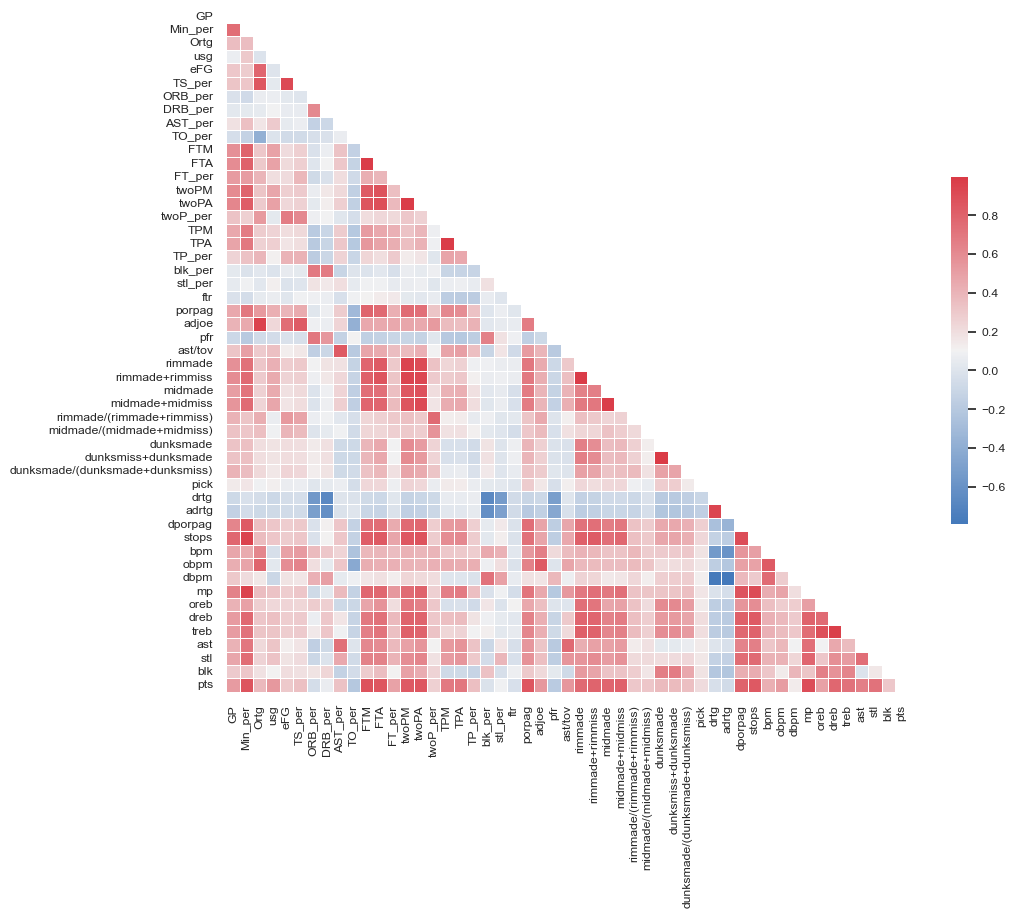

In [65]:
CorrMtx(total_ball_data_noYear.corr(), dropDuplicates = True)

In [69]:
corr = total_ball_data_noYear.corr().stack()

# filter for correlations >= 0.8
high_corr = corr[(corr >= 0.8) & (corr < 1)]

# print results
print(high_corr)

Min_per              FTA                    0.802681
                     twoPA                  0.822429
                     dporpag                0.839877
                     stops                  0.950932
                     mp                     0.958393
                     pts                    0.863632
Ortg                 TS_per                 0.862469
                     adjoe                  0.954529
eFG                  TS_per                 0.920523
TS_per               Ortg                   0.862469
                     eFG                    0.920523
                     adjoe                  0.832215
AST_per              ast/tov                0.839535
FTM                  FTA                    0.982808
                     twoPM                  0.836269
                     twoPA                  0.864607
                     rimmade+rimmiss        0.812558
                     stops                  0.824314
                     pts                    0.

In [70]:
corr = total_ball_data_noYear.corr()

# Filter for correlations >= 0.8
high_corr = corr[(corr >= 0.8) & (corr < 1)]

# Get the columns to be removed
columns_to_remove = high_corr.columns[high_corr.any()]

# Drop the columns from the DataFrame
df_filtered = total_ball_data_noYear.drop(columns_to_remove, axis=1)

In [145]:
total_ball_data.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,dunksmade,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
count,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.00000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000
mean,23.391799,38.274031,94.213112,18.541994,45.940170,49.111131,5.579407,12.803035,10.931027,20.045658,32.906299,47.028542,0.596212,41.586146,85.46118,0.440477,15.899647,46.297732,0.235988,1.896815,1.717485,38.008679,0.810896,91.840845,4.230491,2015.540848,35505.687613,27.382517,45.930692,14.102070,39.304712,3.740585,4.207174,103.305495,103.400938,1.477897,83.202783,-2.362447,-1.741745,-0.620702,-2.325085,17.406669,-1.909394,-0.415691,0.781781,1.959415,2.741196,1.104234,0.542658,0.289937,5.963273,5.584139
std,9.673158,27.722641,26.678415,5.659291,16.939139,15.773605,9.164117,9.631903,8.898464,10.290480,36.264951,48.669958,0.256710,43.040043,83.62283,0.184035,21.337712,57.322894,0.189103,5.781945,1.737545,36.436885,1.332132,26.985196,4.274274,3.454394,19459.447425,29.654491,46.830651,17.236956,43.609865,7.788055,8.542531,9.780664,10.614425,1.056102,63.970667,7.277912,4.955228,4.097934,7.731661,10.432483,5.806353,2.971295,0.732612,1.478397,2.086041,1.175347,0.465807,0.418454,4.924684,5.581991
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2010.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-71.980000,-92.593500,-57.459400,-176.493000,0.000000,-104.966000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,11.300000,85.700000,14.800000,41.200000,44.870000,1.900000,8.700000,4.900000,14.900000,5.000000,8.000000,0.500000,6.000000,15.00000,0.385000,0.000000,2.000000,0.000000,0.100000,0.900000,20.100000,-0.132790,81.170600,2.800000,2013.000000,20062.000000,4.000000,8.000000,1.000000,6.000000,0.000000,0.000000,99.040400,98.042400,0.579765,22.896850,-5.203300,-3.859605,-2.266925,-5.158915,8.000000,-4.252105,-1.671115,0.250000,0.777800,1.105300,0.250000,0.176500,0.031200,1.782600,0.697774
50%,27.000000,37.200000,97.800000,18.200000,48.100000,51.210000,4.400000,12.100000,9.200000,19.100000,21.000000,32.000000,0.667000,28.000000,61.00000,0.466000,6.000000,20.000000,0.284000,0.900000,1.600000,33.100000,0.434119,95.452900,3.800000,2016.000000,34112.000000,18.000000,32.000000,8.000000,24.000000,0.000000,1.000000,103.598000,103.733000,1.312320,77.152900,-1.686780,-1.223480,-0.548842,-1.648290,17.281200,-1.471470,-0.286494,0.555600,1.705900,2.344800,0.714300,0.440000,0.142900,4.741900,4.884220
75%,31.000000,62.700000,107.300000,21.900000,53.600000,56.360000,8.100000,16.200000,15.100000,24.300000,50.000000,71.000000,0.760000,65.000000,133.50000,0.530000,25.000000,75.000000,0.360000,2.500000,2.200000,47.800000,1.533705,107.073500,5.200000,2019.000000,48174.500000,42.000000,71.000000,21.000000,59.000000,4.000000,4.000000,108.063500,109.140000,2.210330,133.765000,1.495650,1.080905,1.152410,1.471030,26.562500,1.055175,1.075945,1.121200,2.823500,3.896600,1.

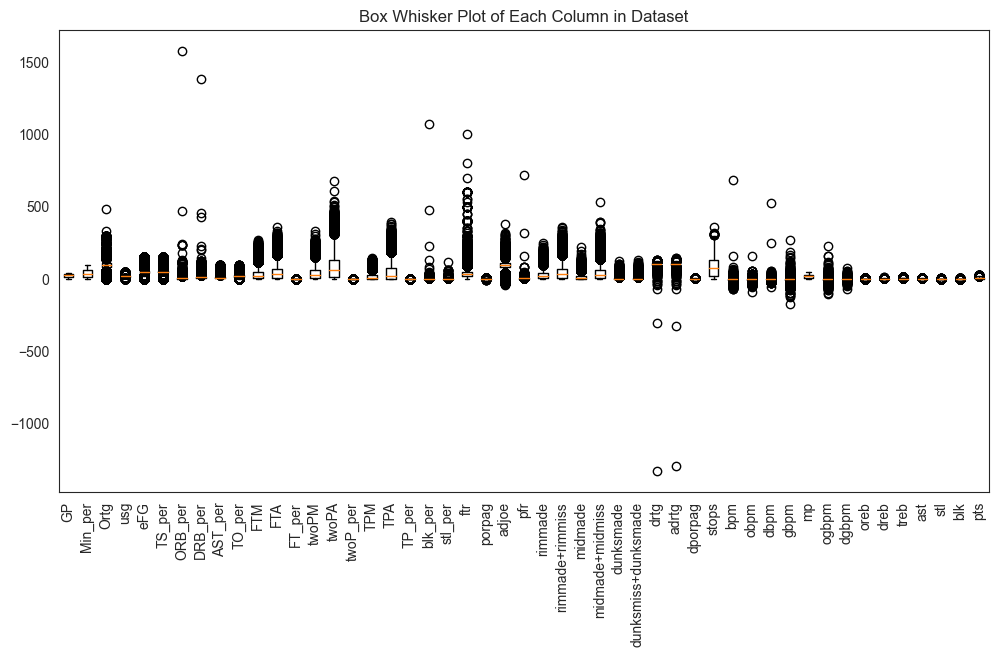

In [169]:
# Create a Box Whisker Plot of each column
plt.figure(figsize=(12, 6))
plt.boxplot([ball_data1[col] for col in ball_data1.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(1,len(ball_data1.columns.values)+1), ball_data1.columns.values)
plt.xticks(rotation=90)
plt.show()

In [185]:
not_drafted = total_ball_data[total_ball_data['pick'] == 0]
not_drafted_sample = not_drafted.sample(n=1500)
drafted = total_ball_data[total_ball_data['pick'] == 1]

In [186]:
def  draw_boxplots_non_drafted(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sn.boxplot(x=var, y="GP", data=not_drafted_sample)
    fig.axis(ymin=0, ymax=350)

In [187]:
def  draw_boxplots_drafted(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sn.boxplot(x=var, y="GP", data=drafted)
    fig.axis(ymin=0, ymax=350)

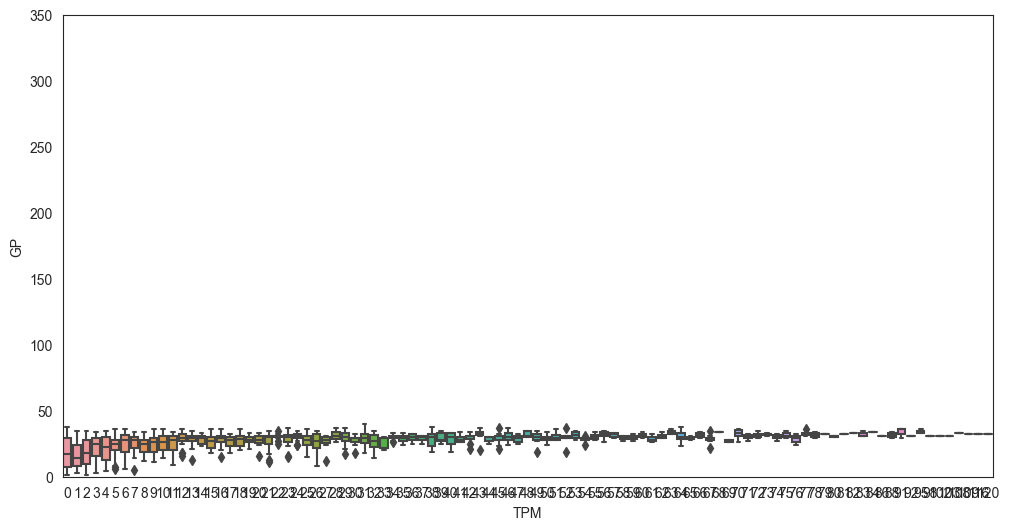

In [188]:
draw_boxplots_non_drafted('TPM')

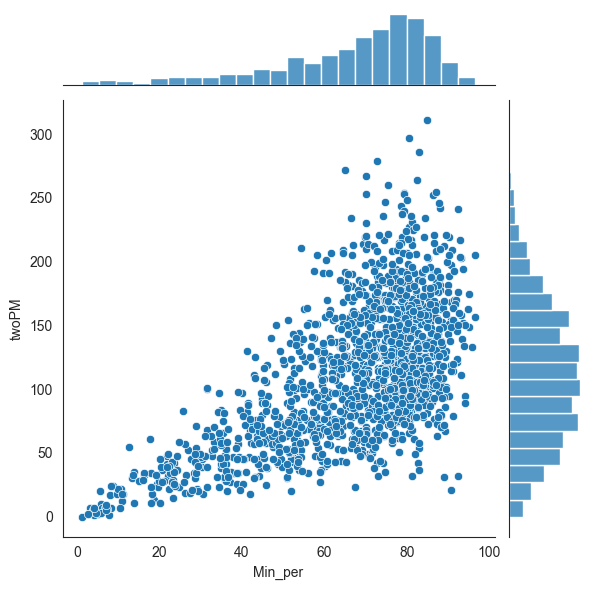

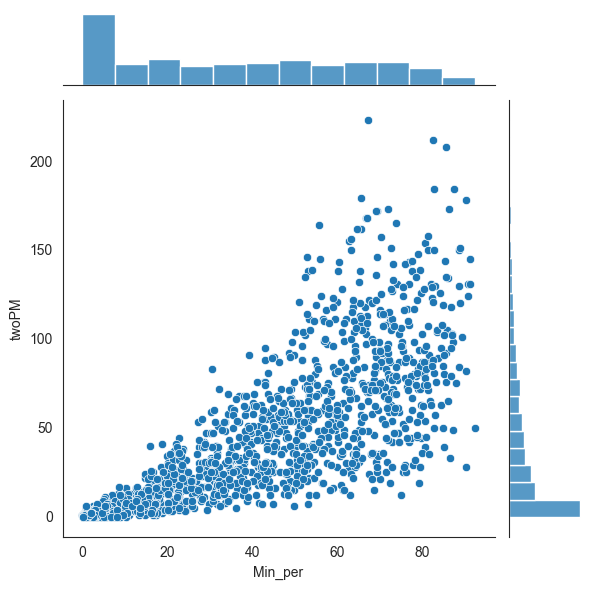

In [99]:
sn.jointplot(x= 'Min_per', y = 'twoPM', data=drafted)
sn.jointplot(x='Min_per', y='twoPM', data=not_drafted_sample)

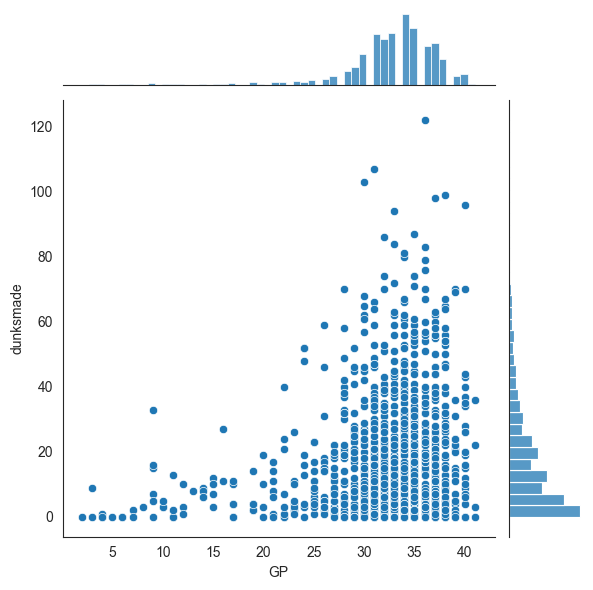

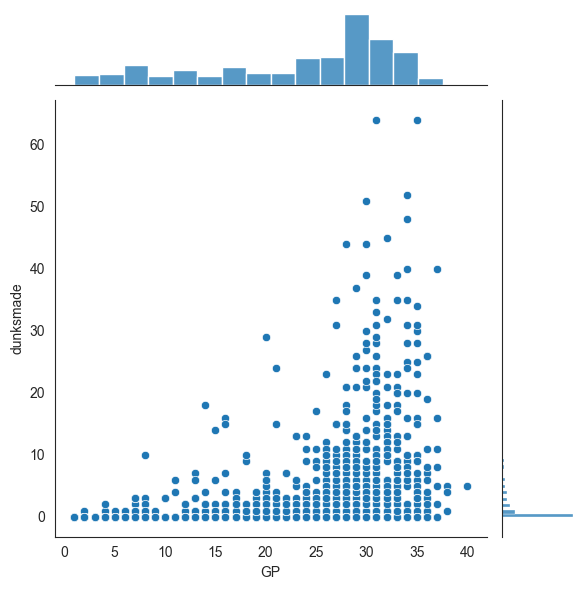

In [194]:
sn.jointplot(x= 'GP', y ='dunksmade', data=drafted)
sn.jointplot(x='GP', y='dunksmade', data=not_drafted_sample)

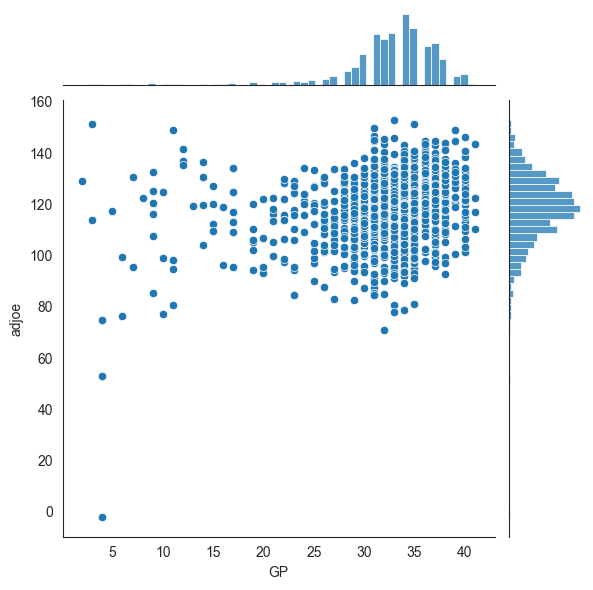

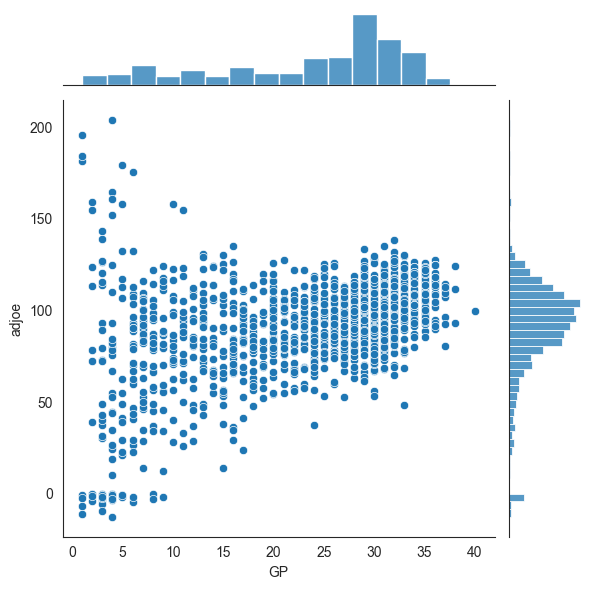

In [195]:
sn.jointplot(x= 'GP', y ='adjoe', data=drafted)
sn.jointplot(x='GP', y='adjoe', data=not_drafted_sample)

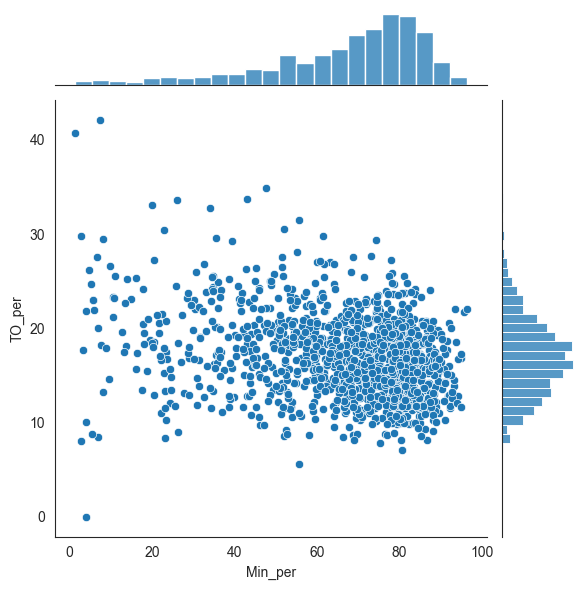

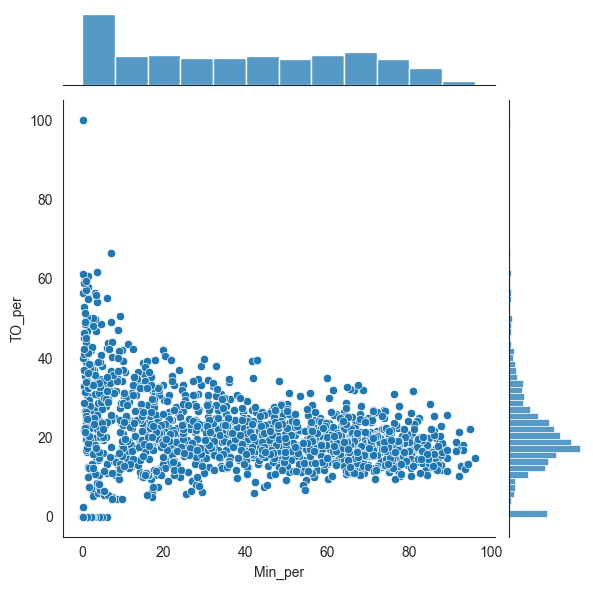

In [203]:
sn.jointplot(x= 'Min_per', y ='TO_per', data=drafted)
sn.jointplot(x='Min_per', y='TO_per', data=not_drafted_sample)

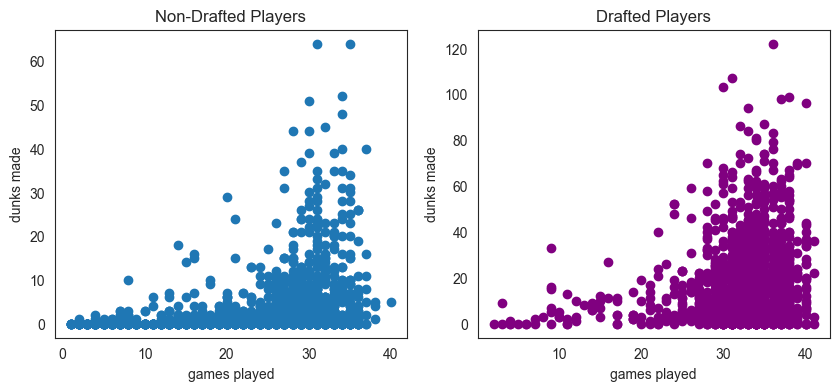

In [210]:
x1 = not_drafted_sample['GP']
y1 = not_drafted_sample['dunksmade']
x2 = drafted['GP']
y2 = drafted['dunksmade']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.scatter(x1, y1)
ax1.set(xlabel='games played',ylabel='dunks made', title='Non-Drafted Players')
ax2.scatter(x2, y2,c='purple')
ax2.set(xlabel='games played',ylabel='dunks made', title='Drafted Players')
#fig.suptitle('Two Scatter Plots')
plt.show()

In [220]:
drafted_players = drafted[(drafted['GP'] >= 30)]['TS_per']
n_drafted_players = not_drafted_sample[(not_drafted_sample['GP'] >= 30)]['TS_per']

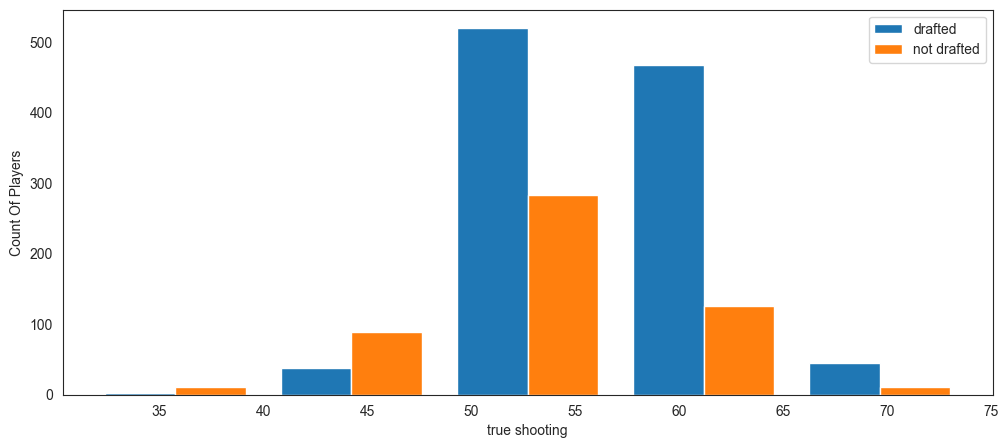

In [221]:
fig, axes = plt.subplots(figsize = (12,5))
labels = ['drafted', 'not drafted']
x = [drafted_players, n_drafted_players]
axes.hist(x, bins = 5, histtype='bar', stacked= False, label = labels)
plt.legend(labels)
plt.xlabel('true shooting')
plt.ylabel('Count Of Players')
plt.show()

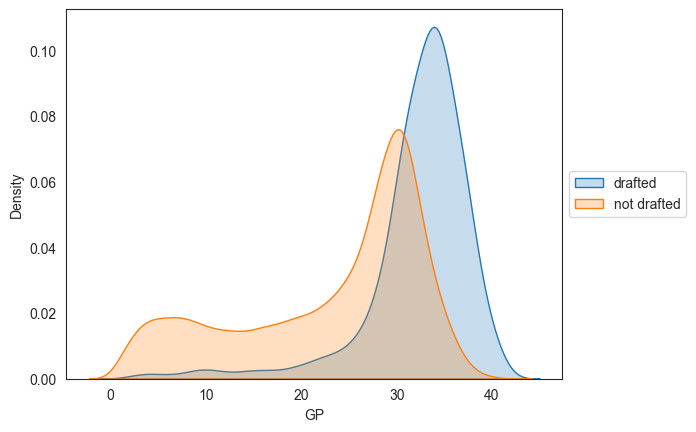

In [227]:
sn.kdeplot(total_ball_data[['GP', 'pick']][total_ball_data['pick'] == 1]['GP'], shade = True, label="drafted")
sn.kdeplot(total_ball_data[['GP', 'pick']][total_ball_data['pick'] == 0]['GP'], shade = True, label="not drafted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

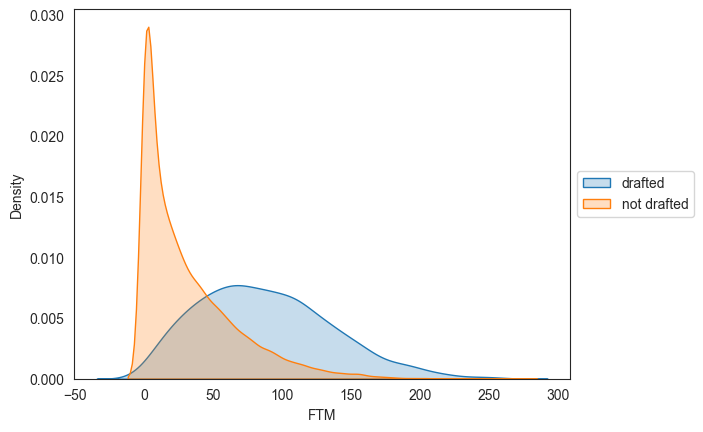

In [234]:
sn.kdeplot(total_ball_data[['FTM','pick']][total_ball_data['pick'] == 1]['FTM'], shade = True, label="drafted")
sn.kdeplot(total_ball_data[['FTM', 'pick']][total_ball_data['pick'] == 0]['FTM'], shade = True, label="not drafted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))